In [20]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# 1. Load Data
file_path = r'C:\Users\adnsk\Downloads\bank.csv'
df = pd.read_csv(file_path)

# 2. Encode Categorical Variables
categorical_cols = [
    'job', 'marital', 'education', 'default', 'housing', 'loan',
    'contact', 'month', 'poutcome', 'deposit'
]
for col in categorical_cols:
    if col in df.columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))

# 3. Scale Numerical Features
numerical_cols = [
    'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'
]
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# 4. Split Features and Target
X = df.drop(columns=['deposit'])
y = df['deposit']

# 5. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 6. Build and Train Models
# Logistic Regression with increased max_iter and robust solver
lr = LogisticRegression(max_iter=2000, solver='saga', random_state=42)
lr.fit(X_train, y_train)

# k-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# 7. Evaluate Models
models = {
    'Logistic Regression': lr,
    'k-Nearest Neighbors': knn,
    'Decision Tree': dt
}

for name, model in models.items():
    print(f"\n{name} Performance:")
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

# 8. Model Comparison and Discussion
print("\nModel Comparison and Discussion:")
print("""
Logistic Regression:
- Strengths: Fast, interpretable, less prone to overfitting with regularization.
- Weaknesses: Assumes linearity, may underperform on complex data.

k-Nearest Neighbors:
- Strengths: Simple, non-parametric, can capture complex boundaries.
- Weaknesses: Sensitive to feature scale and irrelevant features, slow prediction on large data.

Decision Tree:
- Strengths: Handles non-linear data, interpretable, requires little preprocessing.
- Weaknesses: Prone to overfitting, can be unstable with small changes in data.
""")

# To export as PDF, use:
# !jupyter nbconvert --to pdf notebook.ipynb



Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.79      0.82      0.80      1166
           1       0.79      0.76      0.77      1067

    accuracy                           0.79      2233
   macro avg       0.79      0.79      0.79      2233
weighted avg       0.79      0.79      0.79      2233


k-Nearest Neighbors Performance:
              precision    recall  f1-score   support

           0       0.78      0.85      0.81      1166
           1       0.81      0.74      0.77      1067

    accuracy                           0.79      2233
   macro avg       0.80      0.79      0.79      2233
weighted avg       0.80      0.79      0.79      2233


Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.77      0.79      0.78      1166
           1       0.76      0.74      0.75      1067

    accuracy                           0.76      2233
   macro avg       0.76      0.7

<Figure size 1000x600 with 0 Axes>

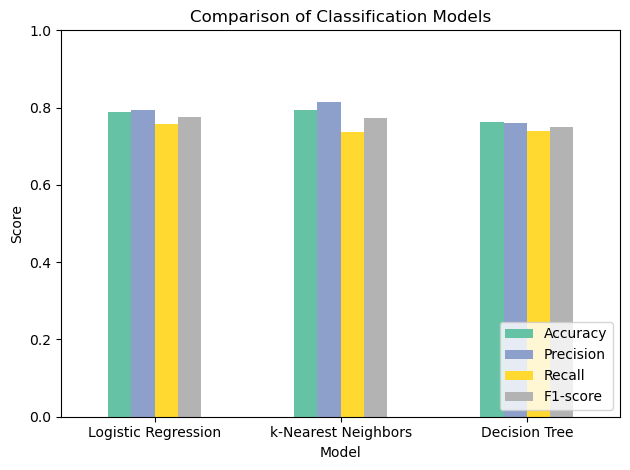

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Collect metrics for each model
metrics = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-score': []}

for name, model in models.items():
    y_pred = model.predict(X_test)
    metrics['Model'].append(name)
    metrics['Accuracy'].append(accuracy_score(y_test, y_pred))
    metrics['Precision'].append(precision_score(y_test, y_pred))
    metrics['Recall'].append(recall_score(y_test, y_pred))
    metrics['F1-score'].append(f1_score(y_test, y_pred))

# Create DataFrame
metrics_df = pd.DataFrame(metrics)
metrics_df.set_index('Model', inplace=True)

# Plot
plt.figure(figsize=(10,6))
metrics_df.plot(kind='bar', ylim=(0,1), colormap='Set2')
plt.title('Comparison of Classification Models')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


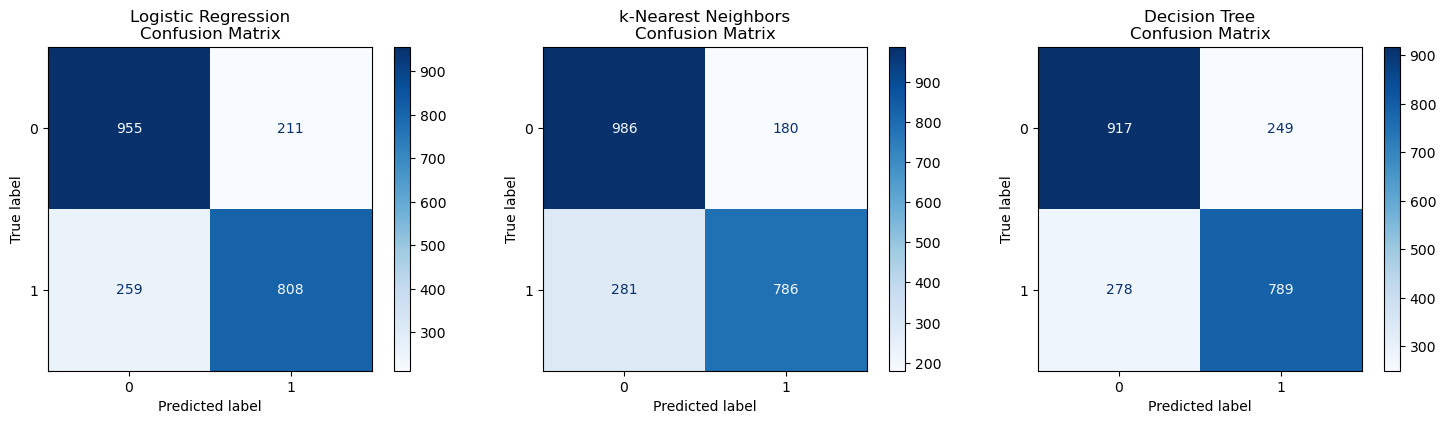

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay

plt.figure(figsize=(15,4))
for idx, (name, model) in enumerate(models.items()):
    plt.subplot(1, 3, idx+1)
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, ax=plt.gca(), cmap='Blues')
    plt.title(f"{name}\nConfusion Matrix")
plt.tight_layout()
plt.show()


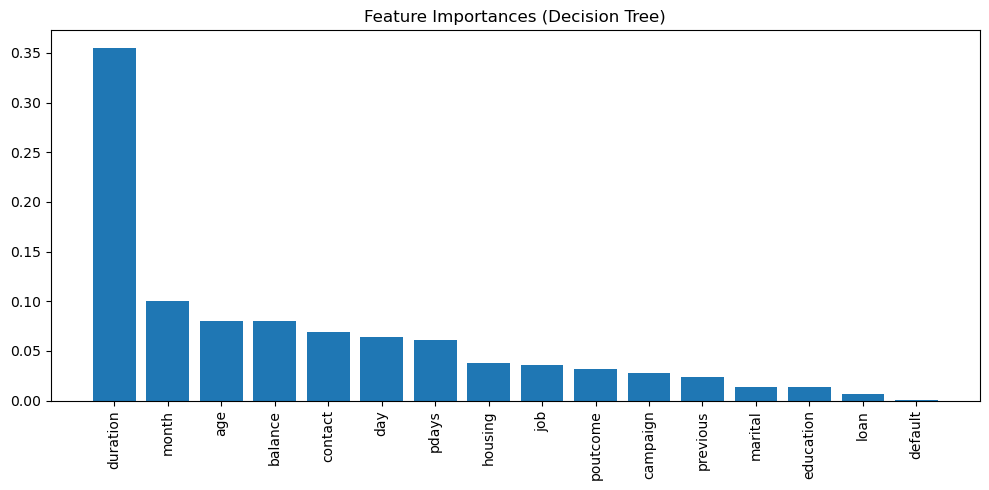

In [23]:
importances = dt.feature_importances_
feat_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,5))
plt.title("Feature Importances (Decision Tree)")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feat_names[indices], rotation=90)
plt.tight_layout()
plt.show()


=== Dataset Shape ===
(11162, 17)

=== Summary Statistics ===
                 age         job  marital  education default       balance  \
count   11162.000000       11162    11162      11162   11162  11162.000000   
unique           NaN          12        3          4       2           NaN   
top              NaN  management  married  secondary      no           NaN   
freq             NaN        2566     6351       5476   10994           NaN   
mean       41.231948         NaN      NaN        NaN     NaN   1528.538524   
std        11.913369         NaN      NaN        NaN     NaN   3225.413326   
min        18.000000         NaN      NaN        NaN     NaN  -6847.000000   
25%        32.000000         NaN      NaN        NaN     NaN    122.000000   
50%        39.000000         NaN      NaN        NaN     NaN    550.000000   
75%        49.000000         NaN      NaN        NaN     NaN   1708.000000   
max        95.000000         NaN      NaN        NaN     NaN  81204.000000   

 

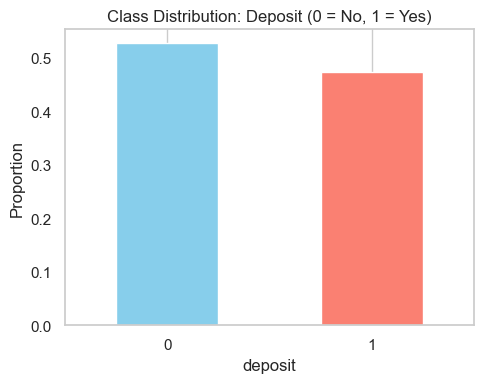

In [28]:
# === EDA (Exploratory Data Analysis) ===

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv(r"C:\Users\adnsk\Downloads\bank.csv")
df.columns = df.columns.str.strip()

# Convert target column to binary
df['deposit'] = df['deposit'].map({'yes': 1, 'no': 0})

# 1. Show dataset shape and summary
print("=== Dataset Shape ===")
print(df.shape)

print("\n=== Summary Statistics ===")
print(df.describe(include='all'))

# 2. Plot: Target variable distribution
plt.figure(figsize=(5,4))
df['deposit'].value_counts(normalize=True).plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution: Deposit (0 = No, 1 = Yes)')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
